In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates
import matplotlib.transforms
import datetime
import requests
import io
%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

plt.style.use('seaborn-darkgrid')
print(plt.style.available)

"""url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
cont = requests.get(url).content

us_data = pd.read_csv(io.StringIO(cont.decode('utf-8')) , header=0, parse_dates=['date'], index_col='date')"""


us_data = pd.read_csv("../Datasets/us-counties.csv" , header=0, parse_dates=['date'], index_col='date')
us_data.shape

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


(852367, 5)

Text(0.5, 1.0, 'Top 5 counties with most deaths')

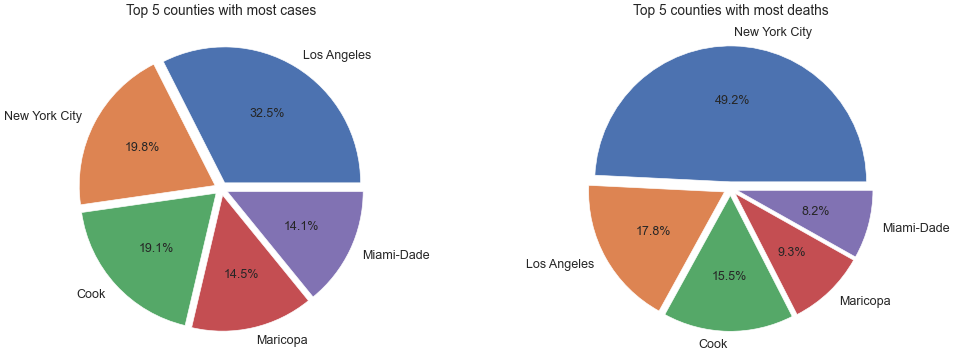

In [68]:
# Top 5 counties with most cases and deaths

#colors = ['#B22222', '#008000', '#7FFFD4', '#BC8F8F', '#228B22']
explode = [0.05, 0.05, 0.05, 0.05, 0.05]

plt.figure(figsize=(10,10), dpi=45)
plt.subplots_adjust(right=2.2)

most_cases_df = us_data.groupby(["county"]).agg({"cases":"max"}).sort_values(by='cases', ascending=False)[0:5]

plt.tight_layout(pad=100.0)
plt.subplot(1,2,1)
plt.pie(most_cases_df['cases'], labels=most_cases_df.index.values,
        explode=explode, autopct="%2.1f%%", textprops={"fontsize":20})
plt.title("Top 5 counties with most cases", fontsize="22")

most_deaths_df = us_data.groupby(["county"]).agg({"deaths":"max"}).sort_values(by='deaths', ascending=False)[0:5]

plt.subplot(1,2,2)
plt.pie(most_deaths_df['deaths'], labels=most_deaths_df.index.values,
        explode=explode, autopct="%2.1f%%", textprops={"fontsize":20})
plt.title("Top 5 counties with most deaths", fontsize="22")

In [69]:
# 5 states with cases and death together

index_list = list(range(0,len(us_data)))
us_data['index_list'] = index_list

new_us_data = us_data
new_us_data['date'] = us_data.index
new_us_data = us_data.set_index('index_list')

# Function to change the index and get maximum case per day
def state_cases(state):
    state_filt = (new_us_data['state'] == state)
    temp_df = new_us_data.loc[state_filt, ['date','cases','deaths']]
    final_df = temp_df.groupby(['date']).agg({"cases":"max", "deaths":"max"})
    
    return final_df
    
# Function to plot state wise cases data
def df_plot(df, state):
    plt.figure(figsize=(14,2), dpi=80);
    plt.plot_date(df.index.values, df['cases'], linestyle="solid", marker=None, label="total cases");
    plt.plot_date(df.index.values, df['deaths'], linestyle="solid", marker=None, label="total deaths");
    plt.gcf().autofmt_xdate();
    dateformat = mpl_dates.DateFormatter("%b");
    plt.gca().xaxis.set_major_formatter(dateformat);
    plt.title(state, fontsize=15);
    plt.tick_params(labelsize=13, pad=3.0);
    today_date=datetime.date.today().strftime("%Y-%m-%d");
    plt.xticks(list(pd.date_range('2020-01-21', today_date, freq='1M')), ha="left", rotation=0);
    plt.tight_layout();
    plt.legend();
    
# Function to query state wise cases and plotting    
def state_wise_plot(state):
    df = state_cases(state)
    df_plot(df, state);

Randomly taken 5 states of interest

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> mark

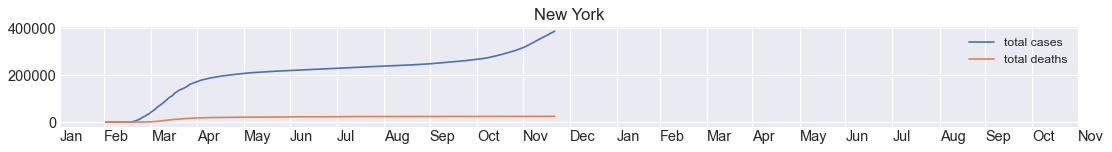

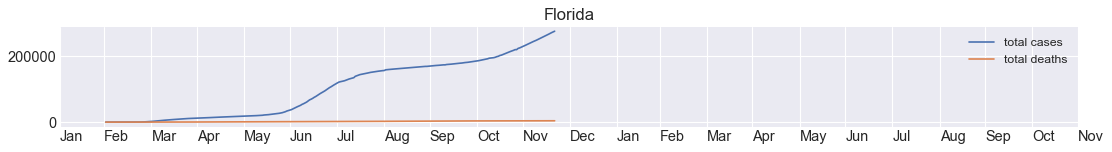

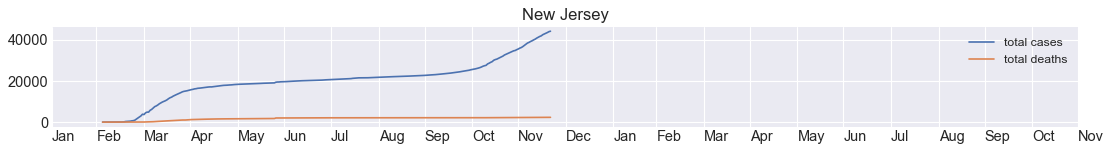

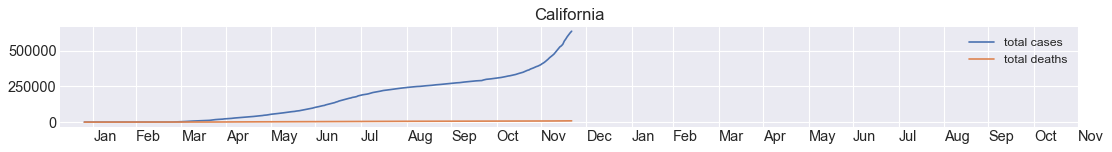

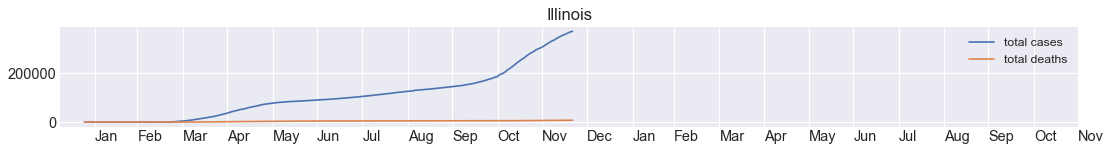

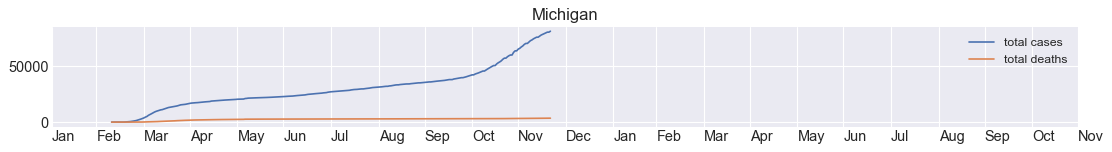

In [70]:
state_list = ['New York', 'Florida', 'New Jersey', 'California', 'Illinois', 'Michigan']

for state_value in state_list:
    state_wise_plot(state_value)

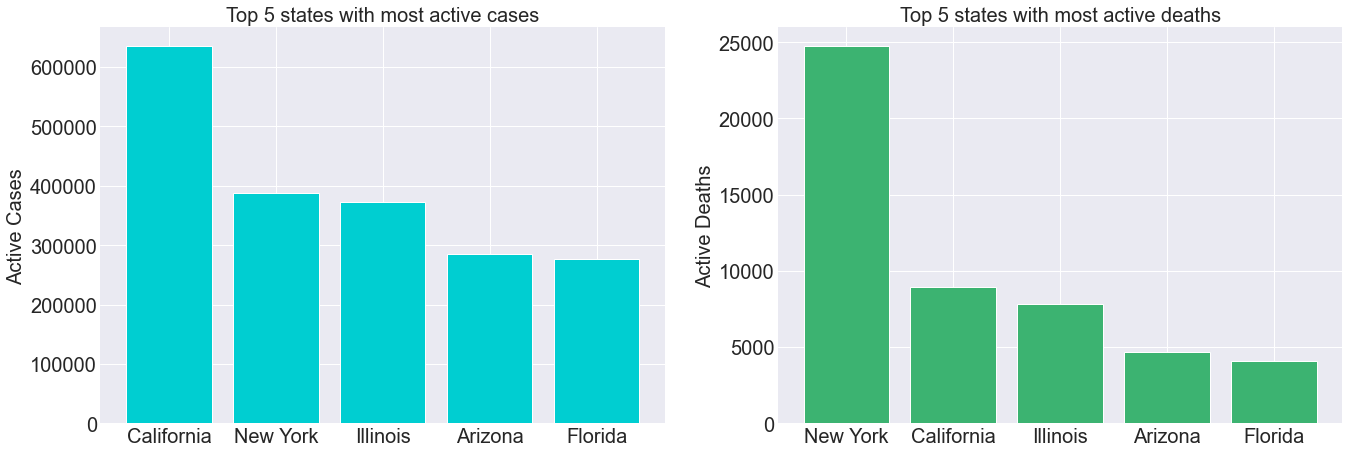

In [71]:
# Top 5 states with most cases and deaths

top5_cases_states = us_data.groupby('state').agg({"cases":"max"}).sort_values(by='cases', ascending=False)[0:5]
top5_deaths_states = us_data.groupby('state').agg({"deaths":"max"}).sort_values(by='deaths', ascending=False)[0:5]

plt.subplots_adjust(right=3.0, top=1.5)

plt.subplot(1,2,1)
plt.bar(top5_cases_states.index.values, top5_cases_states['cases'], color="#00CED1")
plt.title("Top 5 states with most active cases", fontsize=20)
plt.ylabel("Active Cases", fontsize=20)
plt.tick_params(labelsize=20)

plt.subplot(1,2,2)
plt.bar(top5_deaths_states.index.values, top5_deaths_states['deaths'], color="#3CB371")
plt.title("Top 5 states with most active deaths", fontsize=20)
plt.ylabel("Active Deaths", fontsize=20)
plt.tick_params(labelsize=20)

In [72]:
us_data.to_csv("./USFinalCovidData.csv")

In [73]:
import seaborn as sns
import datetime

sns.set(rc={'figure.figsize':(15,9)})

In [74]:
new_us_data.head()

,county,state,fips,cases,deaths,date
index_list,,,,,,
0,Snohomish,Washington,53061.0,1,0.0,2020-01-21
1,Snohomish,Washington,53061.0,1,0.0,2020-01-22
2,Snohomish,Washington,53061.0,1,0.0,2020-01-23
3,Cook,Illinois,17031.0,1,0.0,2020-01-24
4,Snohomish,Washington,53061.0,1,0.0,2020-01-24


<AxesSubplot:xlabel='cases', ylabel='state'>

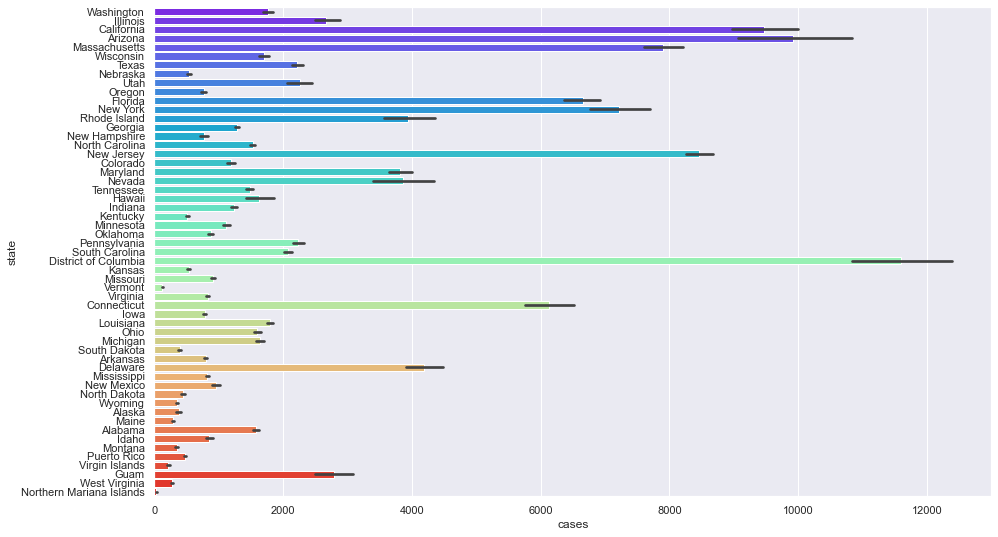

In [75]:
sns.barplot(x="cases",y="state",data=us_data,palette="rainbow")

In [76]:
#sns.barplot(x=max(us_data["deaths"]),y="state",data=us_data,palette="rainbow")